## Alucar - Analisando as vendas

In [1]:
import pandas as pd

alucar = pd.read_csv('data/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [2]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [3]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [4]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [5]:
alucar['mes'] = pd.to_datetime(alucar['mes'], format='%Y/%m/%d')

In [6]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

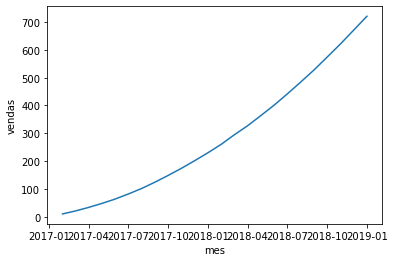

In [8]:
sns.lineplot(x='mes', y='vendas', data=alucar)

### Urban Institute Data Visualization

[Link](https://urbaninstitute.github.io/graphics-styleguide/)

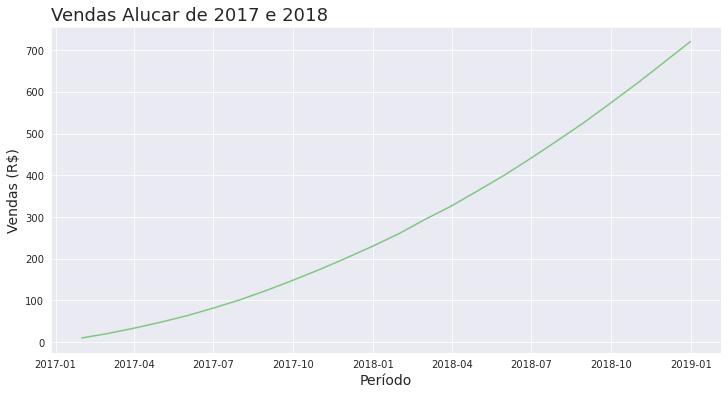

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [19]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [22]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

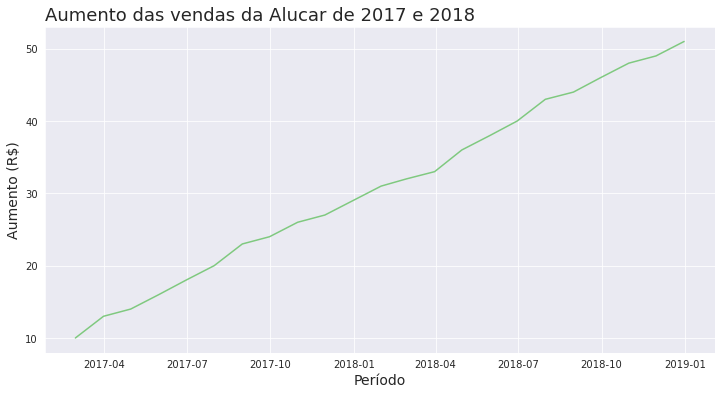

In [23]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Período', 'Aumento (R$)', 'mes', 'aumento', alucar)

In [24]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


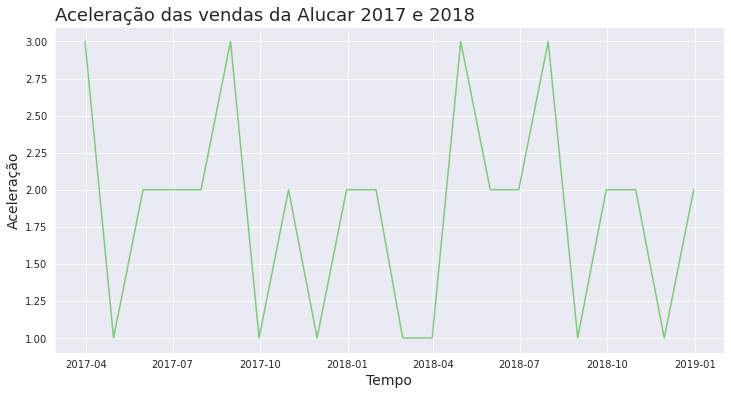

In [26]:
plotar('Aceleração das vendas da Alucar 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

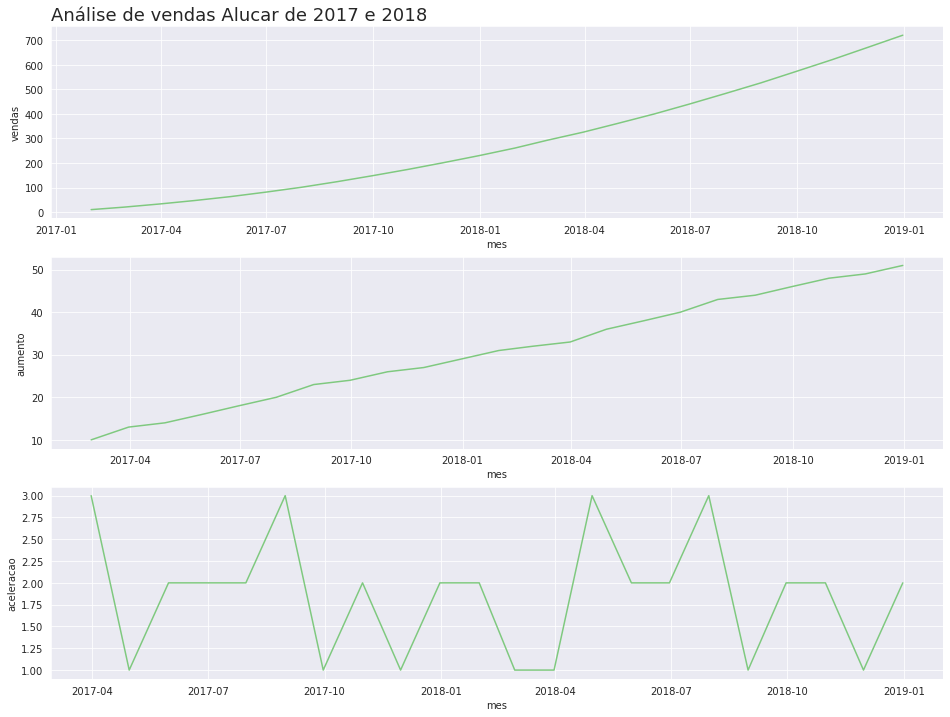

In [28]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [29]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

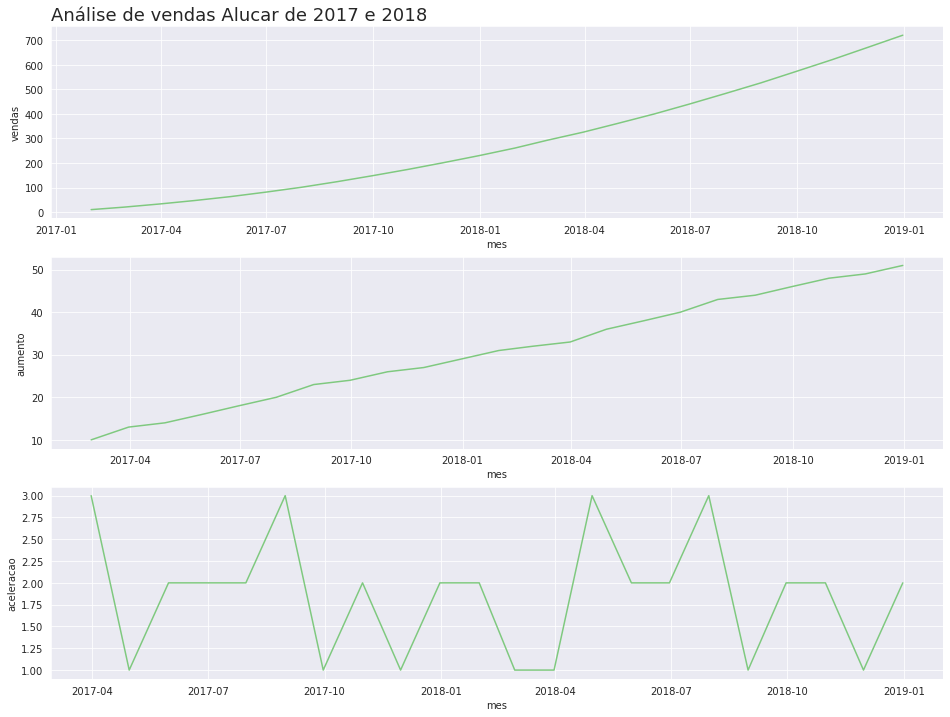

In [31]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',alucar, 'Análise de vendas Alucar de 2017 e 2018')

### Autocorrelação

In [34]:
from pandas.plotting import autocorrelation_plot

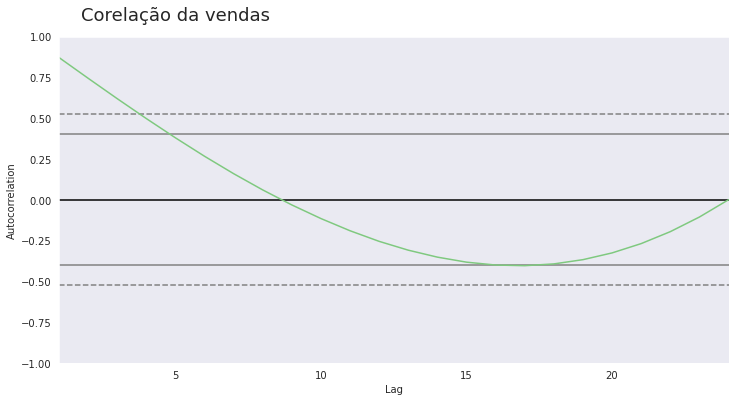

In [39]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Corelação da vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

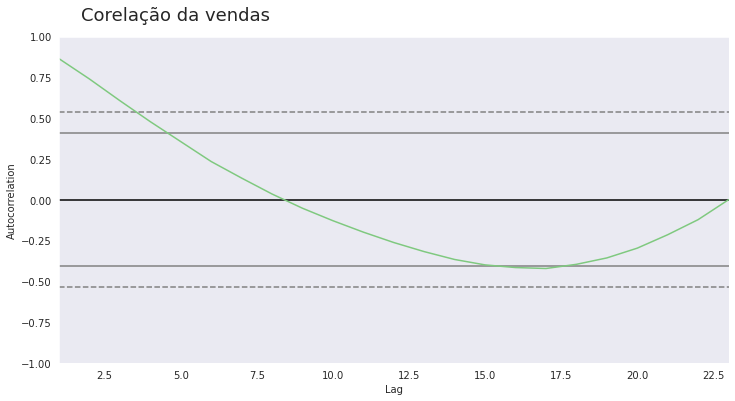

In [41]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Corelação da vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

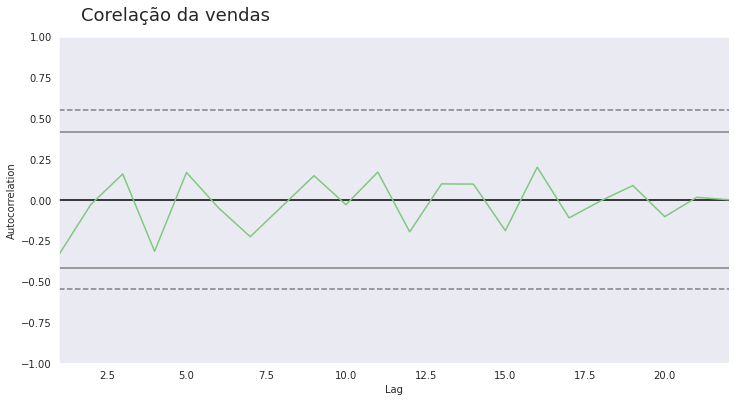

In [42]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Corelação da vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax